## EDA of US Juvenile Crime Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("../input/us-juvenile-arrests-by-crime/arrests_national_juvenile.csv")
data

,id,year,state_abbr,offense_code,offense_name,agencies,population,total_male,total_female,m_0_9,...,f_13_14,f_15,f_16,f_17,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
0,1081,2016,NaN,ASR_ARSON,Arson,13310,264534532,1760,328,117.0,...,114.0,66.0,39.0,43,12581,263887632,1436,516,41.0,48.0
1,1082,2016,NaN,ASR_AST,Aggravated Assault,13310,264534532,16997,5918,141.0,...,1565.0,1171.0,1337.0,1361,12581,263887632,12370,9736,296.0,364.0
2,1083,2016,NaN,ASR_AST_SMP,Simple Assault,13310,264534532,66360,38712,1043.0,...,11210.0,8036.0,8264.0,7590,12581,263887632,59778,41923,1130.0,1378.0
3,1084,2016,NaN,ASR_BRG,Burglary,13310,264534532,23307,3071,167.0,...,727.0,618.0,689.0,833,12581,263887632,14413,11082,368.0,362.0
4,1085,2016,NaN,ASR_CUR,Curfew and Loitering Law Violations,13310,264534532,19218,8319,110.0,...,1991.0,1887.0,2267.0,1701,12581,263887632,15468,11045,382.0,429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,446,1994,NaN,ASR_STP,Stolen Property,10713,208091172,32205,4105,211.0,...,1150.0,905.0,937.0,863,10282,207684879,21242,14077,587.0,364.0
686,447,1994,NaN,ASR_SUS,Suspicion,10713,208091172,1389,330,30.0,...,99.0,76.0,64.0,58,10282,207684879,1171,521,5.0,22.0
687,448,1994,NaN,ASR_VAG,Vagrancy,10713,208091172,2979,683,15.0,...,206.0,143.0,159.0,149,10282,207684879,2599,1010,40.0,13.0
688,449,1994,NaN,ASR_VAN,Vandalism,10713,208091172,110175,12616,5621.0,...,4161.0,2272.0,2050.0,1864,10282,207684879,98391,20722,2073.0,1257.0


In [3]:
data.isnull().sum()

id                          0
year                        0
state_abbr                690
offense_code                0
offense_name                0
agencies                    0
population                  0
total_male                  0
total_female                0
m_0_9                      36
m_10_12                     5
m_13_14                     0
m_15                        0
m_16                        0
m_17                        0
f_0_9                      96
f_10_12                    39
f_13_14                     9
f_15                        6
f_16                        3
f_17                        0
race_agencies               0
race_population             0
white                       0
black                       0
asian_pacific_islander     12
american_indian            29
dtype: int64

In [4]:
data = data.drop('state_abbr', axis = 1)
data = data.dropna()
data

,id,year,offense_code,offense_name,agencies,population,total_male,total_female,m_0_9,m_10_12,...,f_13_14,f_15,f_16,f_17,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
0,1081,2016,ASR_ARSON,Arson,13310,264534532,1760,328,117.0,368.0,...,114.0,66.0,39.0,43,12581,263887632,1436,516,41.0,48.0
1,1082,2016,ASR_AST,Aggravated Assault,13310,264534532,16997,5918,141.0,1406.0,...,1565.0,1171.0,1337.0,1361,12581,263887632,12370,9736,296.0,364.0
2,1083,2016,ASR_AST_SMP,Simple Assault,13310,264534532,66360,38712,1043.0,7406.0,...,11210.0,8036.0,8264.0,7590,12581,263887632,59778,41923,1130.0,1378.0
3,1084,2016,ASR_BRG,Burglary,13310,264534532,23307,3071,167.0,1474.0,...,727.0,618.0,689.0,833,12581,263887632,14413,11082,368.0,362.0
4,1085,2016,ASR_CUR,Curfew and Loitering Law Violations,13310,264534532,19218,8319,110.0,1184.0,...,1991.0,1887.0,2267.0,1701,12581,263887632,15468,11045,382.0,429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,445,1994,ASR_SEX,Sex Offenses,10713,208091172,13357,1105,590.0,1904.0,...,360.0,191.0,147.0,151,10282,207684879,10191,3914,163.0,134.0
685,446,1994,ASR_STP,Stolen Property,10713,208091172,32205,4105,211.0,1677.0,...,1150.0,905.0,937.0,863,10282,207684879,21242,14077,587.0,364.0
686,447,1994,ASR_SUS,Suspicion,10713,208091172,1389,330,30.0,104.0,...,99.0,76.0,64.0,58,10282,207684879,1171,521,5.0,22.0
688,449,1994,ASR_VAN,Vandalism,10713,208091172,110175,12616,5621.0,16102.0,...,4161.0,2272.0,2050.0,1864,10282,207684879,98391,20722,2073.0,1257.0


In [5]:
male = data[['m_0_9', 'm_10_12',
       'm_13_14', 'm_15', 'm_16', 'm_17']]

female = data[['f_0_9', 'f_10_12', 'f_13_14',
       'f_15', 'f_16', 'f_17']]

race_ = data[['black', 'white', 'asian_pacific_islander', 'american_indian']]

## Male participation in criminal activities over the years

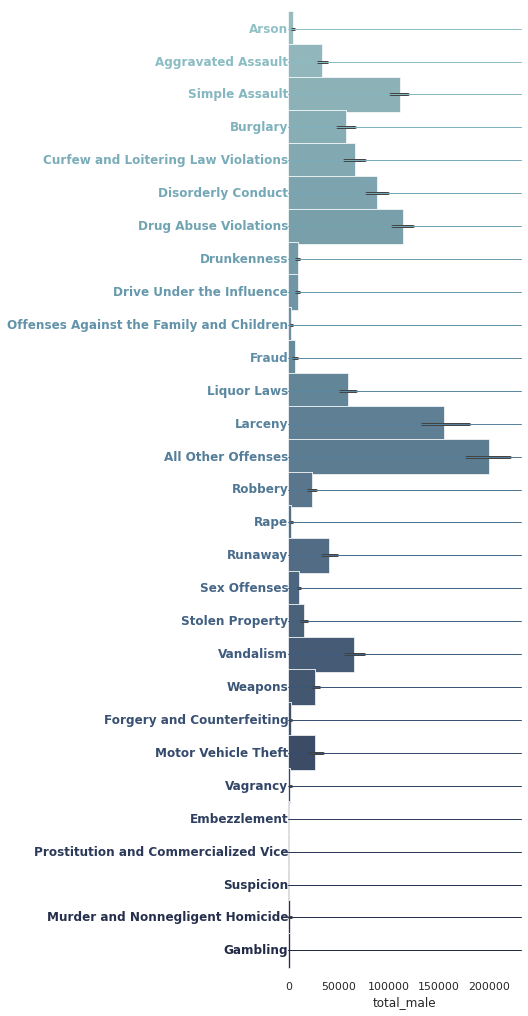

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(30, rot=-.25, light=.7)
g = sns.FacetGrid(data, row="offense_name", hue="offense_name", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.barplot, "total_male",
      clip_on=False,
      fill=True, alpha=1, linewidth=0.7)
g.map(sns.barplot, "total_male", clip_on=False, lw=0.7)
g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.5, label, fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)


g.map(label, "total_male")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
#plt.title('Male participation in criminal activities over the years', fontsize = 16)
plt.show()

## Female participation in criminal activities over the years

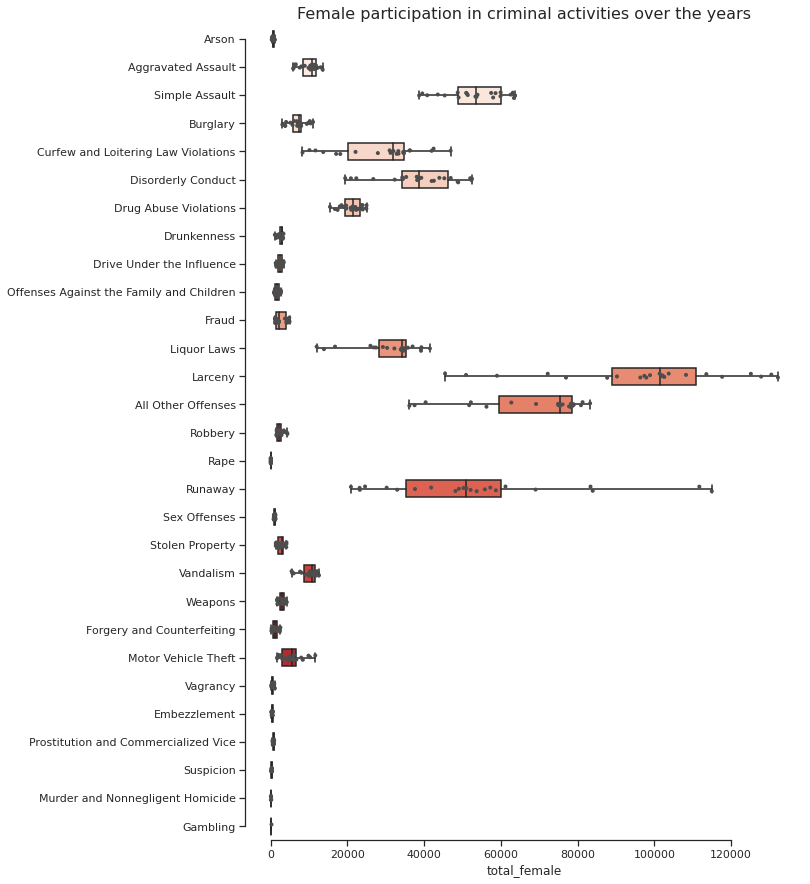

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 15))
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="total_female", y="offense_name", data=data,
            whis=[0, 100], width=.6, palette="Reds")

# Add in points to show each observation
sns.stripplot(x="total_female", y="offense_name", data=data,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
#ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=False)
plt.title('Female participation in criminal activities over the years', fontsize = 16)
plt.show()

## Comparison between male and female participation in juvenile criminal acts

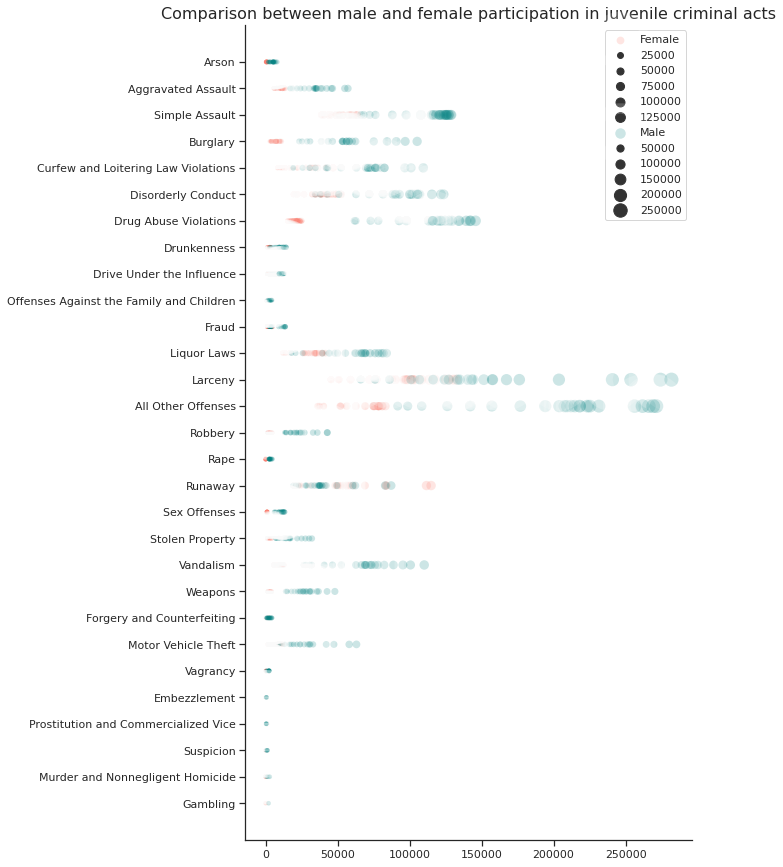

In [8]:
plt.subplots(figsize=(8, 15))

ax = sns.scatterplot(x="total_female", y="offense_name", data=data, linewidth=50, color = 'salmon', alpha = 0.2, size = 'total_female', sizes=(20, 100), label = 'Female')
ax = sns.scatterplot(x="total_male", y="offense_name", data=data, linewidth=50, color = 'teal', alpha = 0.2, size = 'total_male', sizes=(20, 200), label = 'Male')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.title('Comparison between male and female participation in juvenile criminal acts', fontsize = 16)
plt.legend()
plt.show()

## How distribution of male & female juvenile participation looks like?

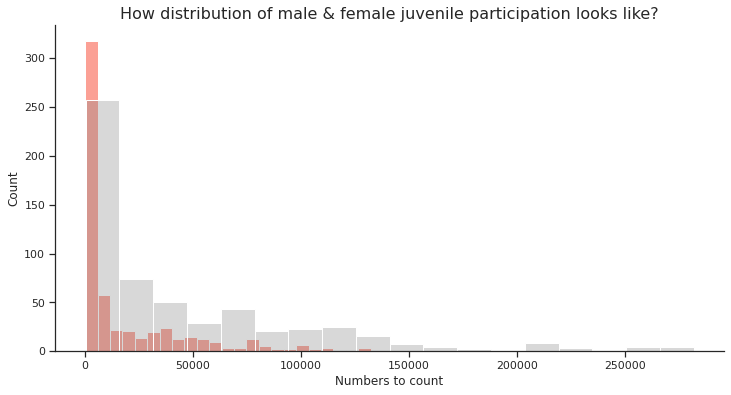

In [9]:
plt.subplots(figsize=(12, 6))
ax = sns.histplot(data.total_female, color = 'salmon')
ax = sns.histplot(data.total_male, color = 'gray', alpha = 0.3)
plt.xlabel('Numbers to count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('How distribution of male & female juvenile participation looks like?', fontsize = 16)
plt.show()

## Agewise criminal acts among the male of 0-17 years old male child

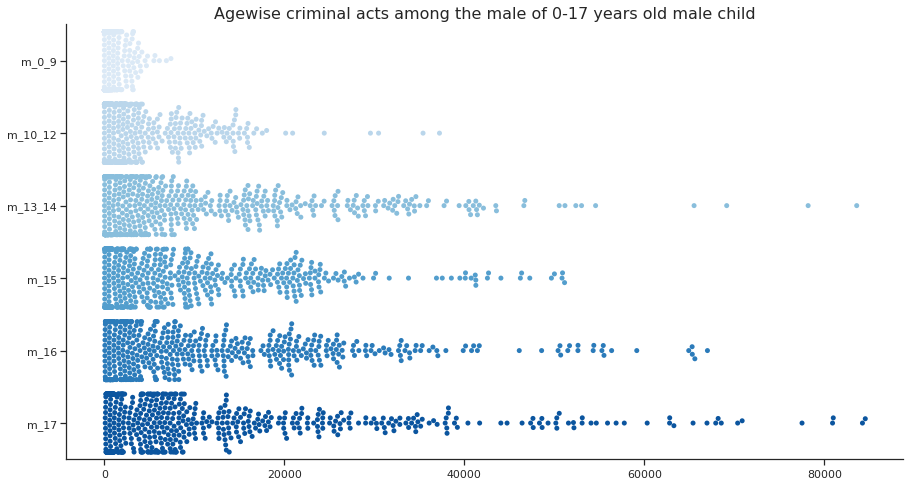

In [10]:
plt.subplots(figsize=(15, 8))
ax = sns.swarmplot(data=male, palette="Blues", orient="h")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Agewise criminal acts among the male of 0-17 years old male child', fontsize = 16)
plt.show()

## Agewise criminal acts among the male of 0-17 years old female child

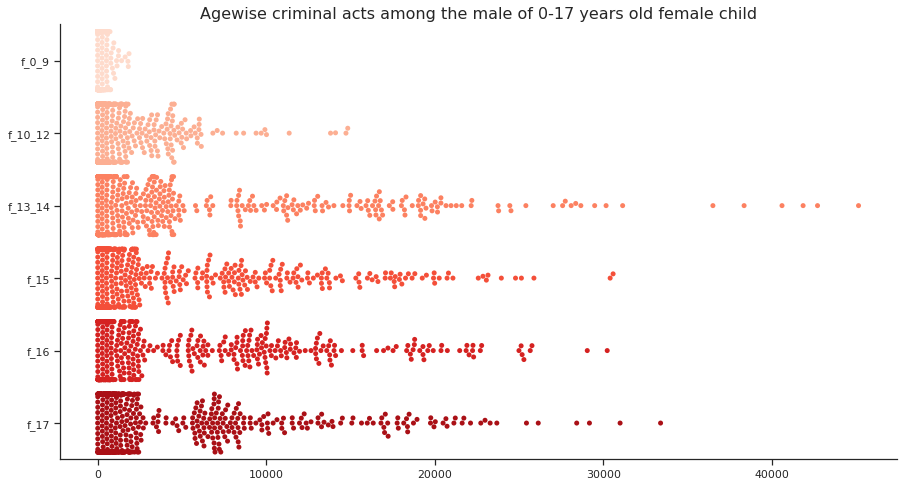

In [11]:
plt.subplots(figsize=(15, 8))
ax = sns.swarmplot(data=female, palette="Reds", orient="h")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Agewise criminal acts among the male of 0-17 years old female child', fontsize = 16)
plt.show()

## Yearly trend of total count of crimes by different age-groups

In [12]:
age_wise = pd.DataFrame()
age_wise['year'] = data.year
age_wise['0_9_yo'] = data['m_0_9'] + data['f_0_9']
age_wise['10_12_yo'] = data['m_10_12'] + data['f_10_12']
age_wise['13_14_yo'] = data['m_13_14'] + data['f_13_14']
age_wise['15_yo'] = data['m_15'] + data['f_15']
age_wise['16_yo'] = data['m_16'] + data['f_16']
age_wise['17_yo'] = data['m_17'] + data['f_17']
age_wise

,year,0_9_yo,10_12_yo,13_14_yo,15_yo,16_yo,17_yo
0,2016,129.0,422.0,662.0,357.0,278.0,240
1,2016,160.0,1871.0,5308.0,4233.0,5176.0,6167
2,2016,1302.0,10759.0,28176.0,20439.0,22398.0,21998
3,2016,201.0,1644.0,6028.0,5407.0,6351.0,6747
4,2016,134.0,1633.0,6151.0,6292.0,7393.0,5934
...,...,...,...,...,...,...,...
684,1994,661.0,2089.0,4785.0,2447.0,2235.0,2245
685,1994,240.0,1898.0,8645.0,7397.0,8733.0,9397
686,1994,39.0,128.0,384.0,396.0,388.0,384
688,1994,6100.0,17892.0,36645.0,21494.0,21529.0,19131


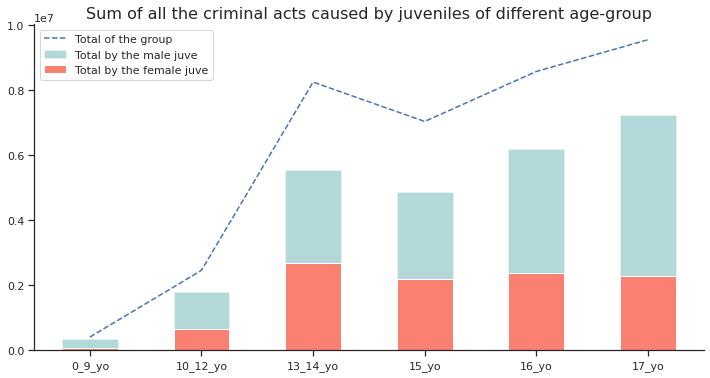

In [13]:
age_ = age_wise[['0_9_yo', '10_12_yo', '13_14_yo', '15_yo', '16_yo', '17_yo']]

plt.subplots(figsize=(12, 6))
ax = male.sum().plot(kind = 'bar', color = 'teal', alpha = 0.3, label = 'Total by the male juve')
ax = female.sum().plot(kind = 'bar', color = 'salmon', label = 'Total by the female juve')
ax = age_.sum().plot(linestyle = '--', label = 'Total of the group')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Sum of all the criminal acts caused by juveniles of different age-group', fontsize = 16)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

## Average criminal acts over the years by juveniles of different age-group

In [14]:
age_wise_mean = age_wise.groupby('year')[ '0_9_yo', '10_12_yo', '13_14_yo', '15_yo', '16_yo', '17_yo'].agg('mean')
age_wise_mean

,0_9_yo,10_12_yo,13_14_yo,15_yo,16_yo,17_yo
year,,,,,,
1994,1378.777778,6558.074074,21091.370370,15920.333333,18153.074074,18951.777778
1995,1225.464286,6007.642857,19571.500000,15957.321429,17947.107143,18736.750000
1996,1236.555556,5737.814815,18806.000000,15840.296296,18695.629630,19417.962963
1997,1208.269231,6099.000000,19067.153846,15976.500000,19378.538462,20557.807692
1998,1058.925926,5202.000000,16161.296296,13804.888889,17137.555556,18915.629630
1999,963.777778,4782.037037,14830.111111,12182.777778,15400.444444,17050.814815
2000,926.307692,4981.730769,15103.384615,12612.230769,15255.269231,17536.807692
2001,892.666667,4918.370370,14479.740741,12196.962963,14942.370370,16303.814815
2002,846.760000,5074.400000,15577.760000,12860.120000,15992.880000,17782.440000


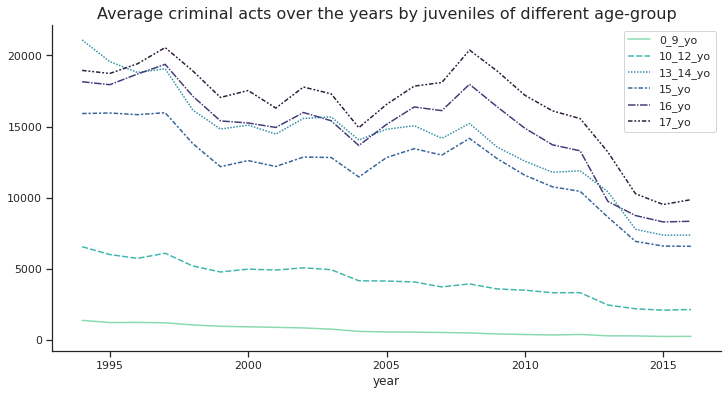

In [15]:
plt.subplots(figsize=(12, 6))
palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(data = age_wise_mean, palette=palette)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Average criminal acts over the years by juveniles of different age-group', fontsize = 16)
plt.show()

In [16]:
age_wise_mean['0_9_yo']

year
1994    1378.777778
1995    1225.464286
1996    1236.555556
1997    1208.269231
1998    1058.925926
1999     963.777778
2000     926.307692
2001     892.666667
2002     846.760000
2003     762.480000
2004     605.964286
2005     565.076923
2006     552.760000
2007     527.000000
2008     497.347826
2009     427.391304
2010     385.000000
2011     354.272727
2012     389.850000
2013     293.739130
2014     288.666667
2015     248.173913
2016     256.095238
Name: 0_9_yo, dtype: float64

In [17]:
import pandas as pd
import numpy as np
date_range = pd.period_range("1994", "2016",freq='Y')
df= pd.DataFrame(index=date_range)

df['0_9_yo'] = age_wise_mean['0_9_yo'].values
df['%_change_0_9_yo'] = df['0_9_yo'].pct_change(1)

df['10_12_yo'] = age_wise_mean['10_12_yo'].values
df['%_change_10_12_yo'] = df['10_12_yo'].pct_change(1)

df['13_14_yo'] = age_wise_mean['13_14_yo'].values
df['%_change_13_14_yo'] = df['13_14_yo'].pct_change(1)

df['15_yo'] = age_wise_mean['15_yo'].values
df['%_change_15_yo'] = df['15_yo'].pct_change(1)

df['16_yo'] = age_wise_mean['16_yo'].values
df['%_change_16_yo'] = df['16_yo'].pct_change(1)

df['17_yo'] = age_wise_mean['17_yo'].values
df['%_change_17_yo'] = df['17_yo'].pct_change(1)

df

,0_9_yo,%_change_0_9_yo,10_12_yo,%_change_10_12_yo,13_14_yo,%_change_13_14_yo,15_yo,%_change_15_yo,16_yo,%_change_16_yo,17_yo,%_change_17_yo
1994,1378.777778,NaN,6558.074074,NaN,21091.370370,NaN,15920.333333,NaN,18153.074074,NaN,18951.777778,NaN
1995,1225.464286,-0.111195,6007.642857,-0.083932,19571.500000,-0.072061,15957.321429,0.002323,17947.107143,-0.011346,18736.750000,-0.011346
1996,1236.555556,0.009051,5737.814815,-0.044914,18806.000000,-0.039113,15840.296296,-0.007334,18695.629630,0.041707,19417.962963,0.036357
1997,1208.269231,-0.022875,6099.000000,0.062948,19067.153846,0.013887,15976.500000,0.008599,19378.538462,0.036528,20557.807692,0.058701
1998,1058.925926,-0.123601,5202.000000,-0.147073,16161.296296,-0.152401,13804.888889,-0.135925,17137.555556,-0.115643,18915.629630,-0.079881
1999,963.777778,-0.089853,4782.037037,-0.080731,14830.111111,-0.082369,12182.777778,-0.117503,15400.444444,-0.101363,17050.814815,-0.098586
2000,926.307692,-0.038878,4981.730769,0.041759,15103.384615,0.018427,12612.230769,0.035251,15255.269231,-0.009427,17536.807692,0.028503
2001,892.666667,-0.036317,4918.370370,-0.012719,14479.740741,-0.041292,12196.962963,-0.032926,14942.370370,-0.020511,16303.814815,-0.070309
2002,846.760000,-0.051426,5074.400000,0.031724,15577.760000,0.075831,12860.120000,0.054371,15992.880000,0.070304,17782.440000,0.090692
2003,762.480000,-0.099532,4941.200000,-0.026249,15681.720000,0.006674,12830.160000,-0.002330,15412.720000,-0.036276,17303.400000,-0.026939


## Change in average criminal acts over the years by juveniles of different age-group

In [18]:
pct_age_wise = df[['%_change_0_9_yo', '%_change_10_12_yo', '%_change_13_14_yo', '%_change_15_yo',
       '%_change_16_yo', '%_change_17_yo']]
pct_age_wise.dropna(inplace= True)
pct_age_wise = pct_age_wise.reset_index(drop = True)
pct_age_wise

,%_change_0_9_yo,%_change_10_12_yo,%_change_13_14_yo,%_change_15_yo,%_change_16_yo,%_change_17_yo
0,-0.111195,-0.083932,-0.072061,0.002323,-0.011346,-0.011346
1,0.009051,-0.044914,-0.039113,-0.007334,0.041707,0.036357
2,-0.022875,0.062948,0.013887,0.008599,0.036528,0.058701
3,-0.123601,-0.147073,-0.152401,-0.135925,-0.115643,-0.079881
4,-0.089853,-0.080731,-0.082369,-0.117503,-0.101363,-0.098586
5,-0.038878,0.041759,0.018427,0.035251,-0.009427,0.028503
6,-0.036317,-0.012719,-0.041292,-0.032926,-0.020511,-0.070309
7,-0.051426,0.031724,0.075831,0.054371,0.070304,0.090692
8,-0.099532,-0.026249,0.006674,-0.002330,-0.036276,-0.026939
9,-0.205272,-0.157138,-0.103558,-0.106803,-0.112996,-0.137424


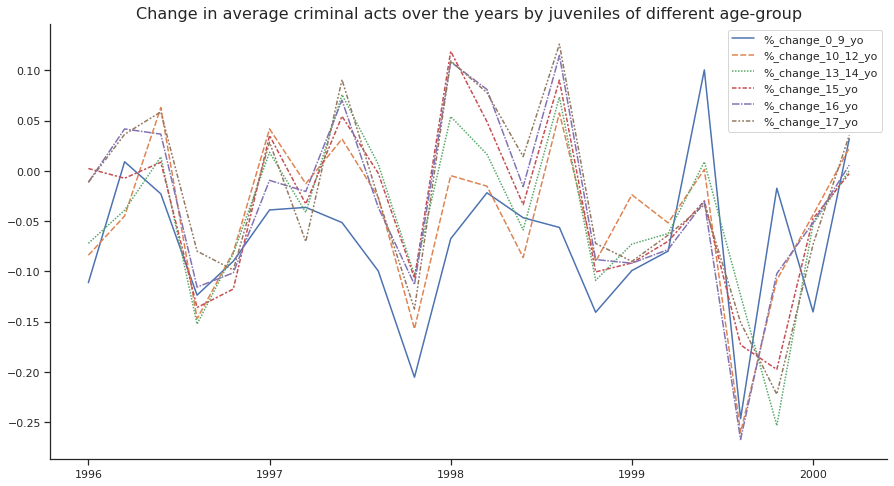

In [19]:
plt.subplots(figsize=(15, 8))
#palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(data = pct_age_wise)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Change in average criminal acts over the years by juveniles of different age-group', fontsize = 16)
ax.set_xticklabels(['1995', '1996','1997','1998', '1999', '2000','2001','2002','2003','2004','2005','2006','2007', '2008','2009','2010', '2011','2012','2013', '2014', '2015', '2016'])
plt.show()

## Criminal acts over the years by juveniles of different racial-group

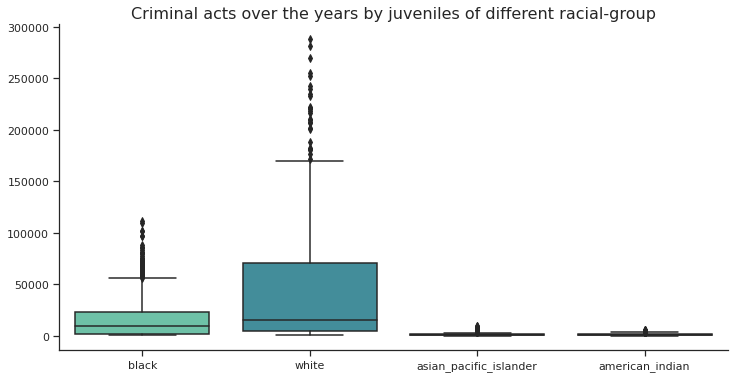

In [20]:
plt.subplots(figsize=(12, 6))
palette = sns.color_palette("mako_r", 4)
race = data[['black', 'white', 'asian_pacific_islander', 'american_indian']]
ax = sns.boxplot(data = race, palette = palette)
plt.title('Criminal acts over the years by juveniles of different racial-group', fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Average criminal acts caused by juveniles of different racial-group

In [21]:
race_wise_mean = data.groupby('year')['black', 'white', 'asian_pacific_islander', 'american_indian'].agg('mean')
race_wise_mean 

,black,white,asian_pacific_islander,american_indian
year,,,,
1994,23380.666667,56215.370370,1409.111111,880.185185
1995,23129.714286,53959.500000,1355.071429,895.857143
1996,21569.666667,55620.370370,1447.444444,972.148148
1997,22544.884615,57087.192308,1457.923077,1039.653846
1998,19338.000000,50553.074074,1143.037037,820.444444
1999,17360.518519,45812.333333,1063.629630,811.296296
2000,17632.346154,46634.923077,1064.884615,817.923077
2001,17637.555556,44243.962963,978.370370,739.592593
2002,17941.360000,48075.000000,1114.280000,856.000000


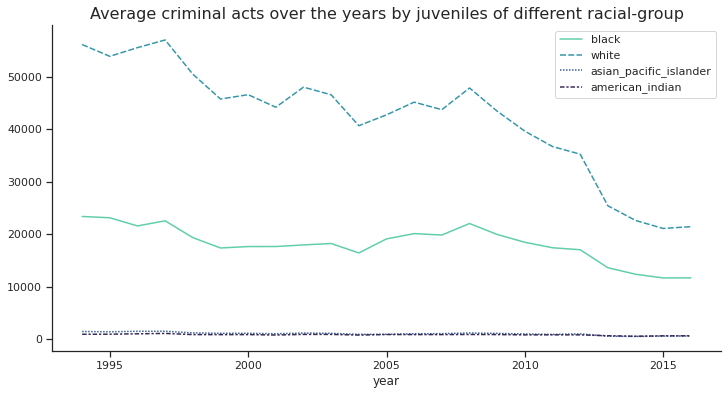

In [22]:
plt.subplots(figsize=(12, 6))
palette = sns.color_palette("mako_r", 4)
ax = sns.lineplot(data = race_wise_mean, palette=palette)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Average criminal acts over the years by juveniles of different racial-group', fontsize = 16)
plt.show()

<img src= "https://www.reedpublicrelations.com/wp-content/uploads/2019/11/Reed-blog-post-image.jpg" alt ="Titanic" style='width: 120px;'>

## If you liked it, please upvote!